<div style="text-align: center;">

  <h1 style="font-size: 18px; margin: 0;">Data Analysis and Visualization for</h1>
  <h2 style="font-size: 18px; margin: 0;">USDA Food Data Central (SR Data) - April 2019</h2>

</div>

<div style="text-align: center;">
  <p style="font-size: 14px; margin: 0 auto;">Guru Prakash Pulipati</p>
</div>

### 1. Set-up

Analyzing Nutrient Levels Across Food Categories to Understand Dietary Trends and Explore the Potential of a Mobile Tool for Personalized Dietary Recommendations

Data Set details: <br>
Data provided by My Food Data (https://www.myfooddata.com)<br>
Link to download complete data : https://tools.myfooddata.com/nutrition-facts-database-spreadsheet.php<br>
This data is originally sourced from the USDA Food Data Central https://fdc.nal.usda.gov/ - SR Data from April 2019

Note: Per serving sizes are considered as 100 grams. Calories(kcal), Protein(g), Carbohydrate(g), Fat(g), Fiber(g), Total Sugars(g) calculated accordingly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
food_df = pd.read_csv("nutrition_facts_dataset.csv")

### 2. Thorough exploration of the non-value qualities of the data

In [3]:
food_df.head()

,ID,Product,Food Group,Calories,Protein,Carbohydrate,Fat,Fiber,Total Sugars
0,167512,Pillsbury Golden Layer Buttermilk Biscuits Art...,Baked Foods,307,5.88,41.18,13.24,1.2,5.88
1,167513,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,330,4.34,53.42,11.27,1.4,21.34
2,167516,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,273,6.58,41.05,9.22,2.2,4.30
3,167517,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,309,7.42,48.39,9.49,2.6,4.41
4,167518,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,289,6.92,44.16,9.40,2.4,4.50


In [4]:
print("Number of records:", len(food_df))
print("Number of features (columns):", food_df.shape[1])
print("Variable names and data types:")
print(food_df.dtypes)

# numerical, categorical, discrete, continuous, unique_values_categorical variables
numerical_vars = food_df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_vars = food_df.select_dtypes(include=['object']).columns.tolist()
discrete_vars = [var for var in numerical_vars if food_df[var].nunique() < 10]
continuous_vars = [var for var in numerical_vars if var not in discrete_vars]
unique_values_categorical = {var: food_df[var].nunique() for var in categorical_vars}

print("Numerical variables:", numerical_vars)
print("Categorical variables:", categorical_vars)
print("Discrete numerical variables:", discrete_vars)
print("Continuous numerical variables:", continuous_vars)
print("Number of unique values for categorical data:")
for var, count in unique_values_categorical.items():
    print(f"\t{var}: {count}")

Number of records: 4964
Number of features (columns): 9
Variable names and data types:
ID                int64
Product          object
Food Group       object
Calories          int64
Protein         float64
Carbohydrate    float64
Fat             float64
Fiber           float64
Total Sugars    float64
dtype: object
Numerical variables: ['ID', 'Calories', 'Protein', 'Carbohydrate', 'Fat', 'Fiber', 'Total Sugars']
Categorical variables: ['Product', 'Food Group']
Discrete numerical variables: []
Continuous numerical variables: ['ID', 'Calories', 'Protein', 'Carbohydrate', 'Fat', 'Fiber', 'Total Sugars']
Number of unique values for categorical data:
	Product: 4964
	Food Group: 9


Given my goals of identifying overall nutritional trends, highlighting differences between food groups, informing dietary choices, and public health insights, this dataset appears well-suited for analysis. The basic necessary data cleaning steps, including handling missing values (NAs), subsetting relevant data, and converting units, have been taken care of while choosing the data set.

### 3. Thorough exploration of the data values

In [5]:
food_df.describe()

,ID,Calories,Protein,Carbohydrate,Fat,Fiber,Total Sugars
count,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000
mean,530514.899678,229.235697,7.012238,30.292057,9.003602,1.944158,11.200659
std,302412.504177,142.679807,6.443219,25.172298,9.196594,2.832739,16.381180
min,167512.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,172749.750000,106.000000,2.520000,10.570000,1.850000,0.300000,1.520000
50%,783473.500000,222.000000,5.770000,21.210000,6.520000,1.200000,3.690000
75%,785790.250000,342.000000,10.200000,48.300000,13.572500,2.400000,13.322500
max,789769.000000,900.000000,85.600000,100.000000,100.000000,77.300000,99.800000


In [6]:
print("Range of values for numerical variables:")
for col in food_df.select_dtypes(include=['int64', 'float64']):
    print(f"{col}: {food_df[col].min()} - {food_df[col].max()}")

Range of values for numerical variables:
ID: 167512 - 789769
Calories: 0 - 900
Protein: 0.0 - 85.6
Carbohydrate: 0.0 - 100.0
Fat: 0.0 - 100.0
Fiber: 0.0 - 77.3
Total Sugars: 0.0 - 99.8


In [7]:
food_df.isnull().sum() # No Null values in the data set

ID              0
Product         0
Food Group      0
Calories        0
Protein         0
Carbohydrate    0
Fat             0
Fiber           0
Total Sugars    0
dtype: int64

In [8]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

kcal_outliers = find_outliers(food_df, 'Calories')
protein_outliers = find_outliers(food_df, 'Protein')
carb_outliers = find_outliers(food_df, 'Carbohydrate')
sugar_outliers = find_outliers(food_df, 'Total Sugars')
fat_outliers = find_outliers(food_df, 'Fat')
fiber_outliers = find_outliers(food_df, 'Fiber')

print("kcal_outliers:", len(kcal_outliers))
print("protein_outliers:", len(protein_outliers))
print("carb_outliers:", len(carb_outliers))
print("sugar_outliers:", len(sugar_outliers))
print("fat_outliers:", len(fat_outliers))
print("fiber_outliers:", len(fiber_outliers))

kcal_outliers: 5
protein_outliers: 104
carb_outliers: 0
sugar_outliers: 590
fat_outliers: 149
fiber_outliers: 355


In [9]:
def check_infinities(df):
    return df[df.applymap(lambda x: np.isinf(x) if isinstance(x, (int, float)) else False).any(axis=1)]

infinities = check_infinities(food_df)

print("infinities:",len(infinities))

infinities: 0


Overall we have the following abnormals in the data set, i.e some Outliers and no Null and Infinities  

Outliers:
kcal_outliers: 5
protein_outliers: 104
carb_outliers: 0
sugar_outliers: 590
fat_outliers: 149
fiber_outliers: 355

<Axes: >

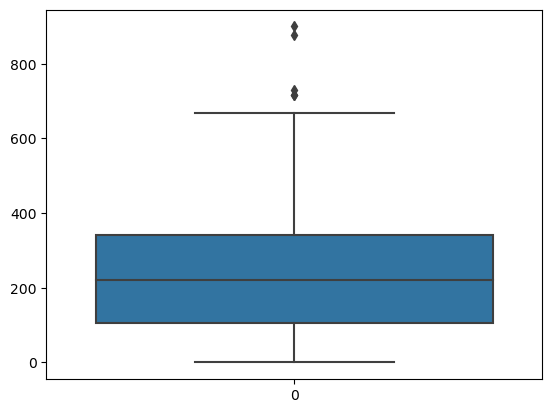

In [10]:
sns.boxplot(data=food_df['Calories'])

Since the data distribution for Calorie values is skewed and contains outliers, imputing missing values using the median is a recommended approach.

In [11]:
# outliers in the Calories column
Q1 = food_df['Calories'].quantile(0.25)
Q3 = food_df['Calories'].quantile(0.75)
IQR = Q3 - Q1

# bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Impute the outliers with the median value
median_value = food_df['Calories'].median()
food_df['Calories'] = food_df['Calories'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)


<Axes: >

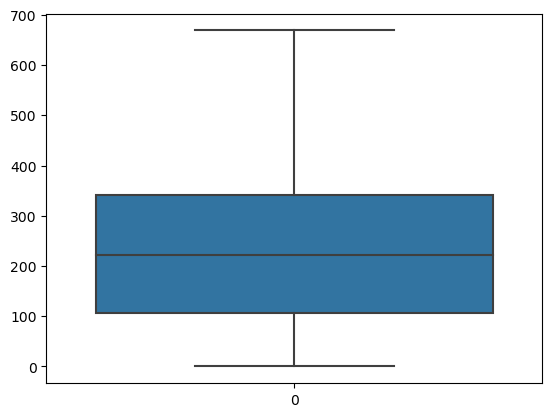

In [12]:
sns.boxplot(data=food_df['Calories'])

In [13]:
# check the outliers again
kcal_outliers = find_outliers(food_df, 'Calories')
print("kcal_outliers:", len(kcal_outliers))

kcal_outliers: 0


<Axes: >

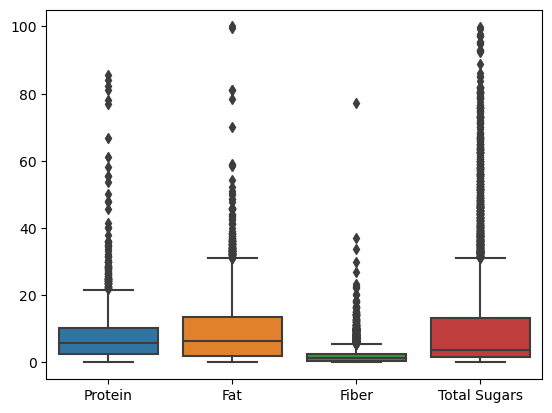

In [14]:
# check the same for the other columns
sns.boxplot(data=food_df[['Protein', 'Fat', 'Fiber', 'Total Sugars' ]])

Well going with the same approach as the pattern is the same like Calories for these variables. During the test, its observed that we need 5 iteration required to address all outlier across remaining variables 

In [15]:
def impute_outliers_with_median(df, column, iterations=5):
    for _ in range(iterations):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df[column].median()
        df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    return df

# Columns to impute
columns_to_impute = ['Protein', 'Fat', 'Fiber', 'Total Sugars']

# Impute outliers for each column
for column in columns_to_impute:
    food_df = impute_outliers_with_median(food_df, column)

In [16]:
protein_outliers = find_outliers(food_df, 'Protein')
sugar_outliers = find_outliers(food_df, 'Total Sugars')
fat_outliers = find_outliers(food_df, 'Fat')
fiber_outliers = find_outliers(food_df, 'Fiber')

print("protein_outliers:", len(protein_outliers))
print("sugar_outliers:", len(sugar_outliers))
print("fat_outliers:", len(fat_outliers))
print("fiber_outliers:", len(fiber_outliers))

protein_outliers: 0
sugar_outliers: 0
fat_outliers: 0
fiber_outliers: 0


<Axes: >

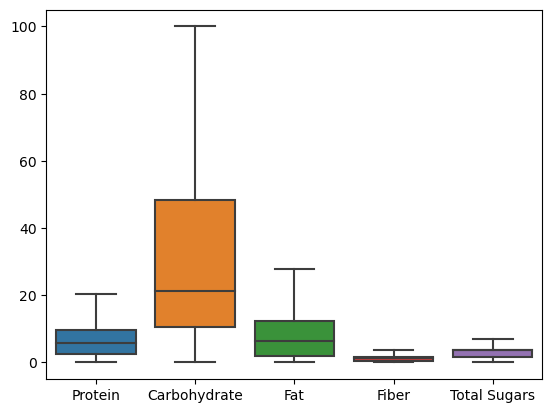

In [17]:
# check the same for the all columns expect Calories, as its alreay knowsn that no outliers
sns.boxplot(data=food_df[['Protein', 'Carbohydrate', 'Fat', 'Fiber', 'Total Sugars' ]])

<Axes: >

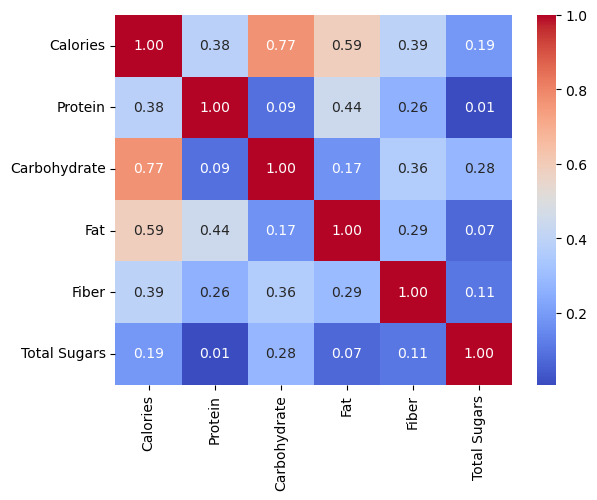

In [18]:
# Compute the correlation matrix
columns_to_plot = ['Calories', 'Protein', 'Carbohydrate', 'Fat', 'Fiber', 'Total Sugars' ]
corr_matrix = food_df[columns_to_plot].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

As per the correlation matrix, Carbohydrates exhibit a strong correlation with Calories.

Finally, I have the cleaned dataset with no abnormal values like null/missing, outliers, or infinities, and the ranges are all verified. I don't have any categorical variables that need to be represented in numerical form or numerical variables in categorical form to provide useful insights.

For demonstration purposes, I will select the 'Calories' column from the dataset and create a new column named 'Calorie_Level'. This new column will categorize calorie levels into groups such as 'Low', 'Medium', 'High', and 'Very High', based on predefined bins corresponding to numerical values of the 'Calories' variable. These bins are established according to nutritional guidelines: 'Low' (0 to 150), 'Medium' (151 to 300), 'High' (301 to 450), and 'Very High' (450+).

In [19]:
# Define bins and labels for the Calories column
bins = [0, 151, 301, 451, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column 'Calorie_Level' by binning the Calories column
food_df['Calorie_Level'] = pd.cut(food_df['Calories'], bins=bins, labels=labels, right=False)

In [20]:
food_df.head(2)

,ID,Product,Food Group,Calories,Protein,Carbohydrate,Fat,Fiber,Total Sugars,Calorie_Level
0,167512,Pillsbury Golden Layer Buttermilk Biscuits Art...,Baked Foods,307.0,5.88,41.18,13.24,1.2,5.88,High
1,167513,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,330.0,4.34,53.42,11.27,1.4,3.69,High


In [21]:
food_df.to_csv('processed_Nutrition_Facts_data.csv', index=False) # this is used for Tableau dashboard

### 4 . Data Visualization

#### 1. Identifying Overall Nutritional Trends

##### Distribution of Calories and Macronutrients (Carbs, Protein, Fat, Fiber and Total Sugars)

Analyze how calorie and macronutrient content varies across different food groups. This can reveal if some groups are generally higher or lower in calories, carbs, protein, or fat.

Text(0.5, 1.0, 'Nutrition Facts Data Set: Products vs Food Groups')

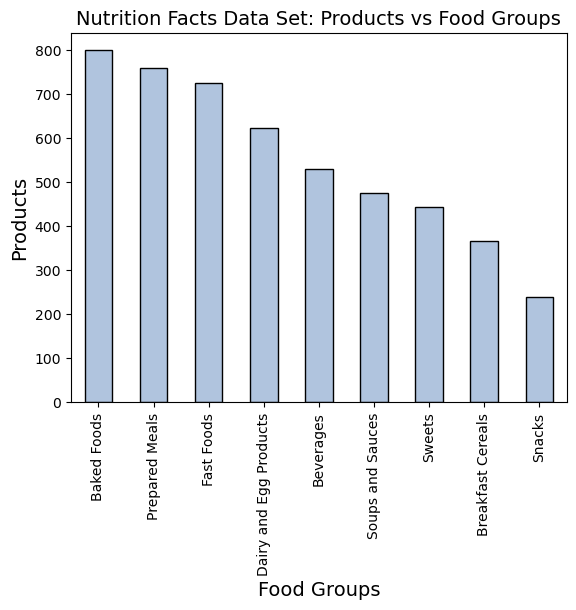

In [22]:
# Visulize the Data Set 
food_df['Food Group'].value_counts().plot(kind='bar', color = 'lightsteelblue', edgecolor='black')
plt.xlabel('Food Groups', fontsize=14)
plt.ylabel('Products', fontsize=14)
plt.title('Nutrition Facts Data Set: Products vs Food Groups', fontsize=14)

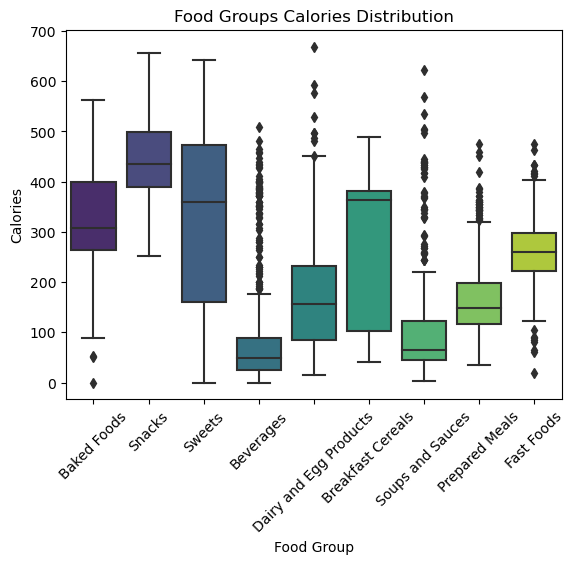

In [23]:
sns.boxplot(x='Food Group', y='Calories', data=food_df, palette='viridis')
plt.title('Food Groups Calories Distribution')
plt.xlabel('Food Group')
plt.ylabel('Calories')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

We can observe that there are outliers in some of the Food Groups. While the outliers for Calories as a whole have been normalized, the outliers for each Food Group are retained. This decision was made considering that the products are typical for their categories and should remain in the list.   

Text(0.5, 1.0, 'Calories vs Food Group by Calorie Level')

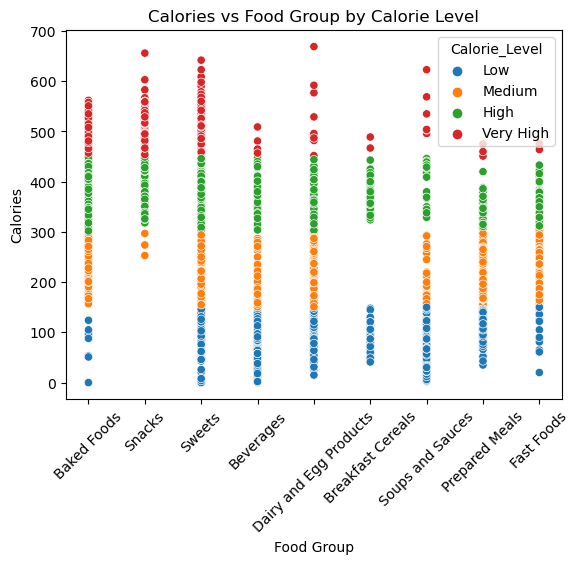

In [24]:
# Create the scatter plot
sns.scatterplot(x='Food Group', y='Calories', hue='Calorie_Level', data=food_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Food Group')
plt.ylabel('Calories')
plt.title('Calories vs Food Group by Calorie Level')

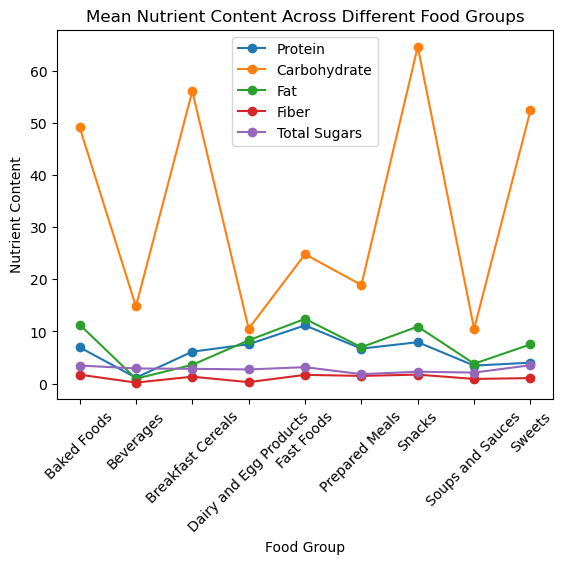

In [25]:
# Calculate the mean nutrient content for each nutrient across all data, grouped by Food Group
mean_nutrients = food_df.groupby('Food Group')[['Protein', 'Carbohydrate', 'Fat', 'Fiber', 'Total Sugars']].mean().reset_index()

# Plot lines for each nutrient
for nutrient in ['Protein', 'Carbohydrate', 'Fat', 'Fiber', 'Total Sugars']:
    plt.plot('Food Group', nutrient, data=mean_nutrients, marker='o', label=nutrient)

# Add labels and title
plt.xlabel('Food Group')
plt.xticks(rotation=45)
plt.ylabel('Nutrient Content')
plt.title('Mean Nutrient Content Across Different Food Groups')
plt.legend()

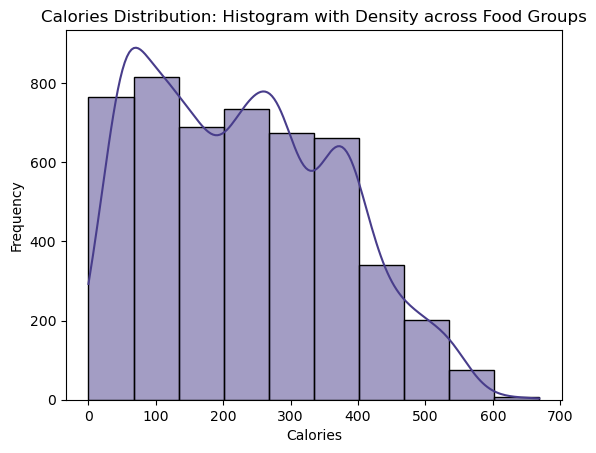

In [26]:
sns.histplot(food_df['Calories'], bins=10, kde=True, color='darkslateblue')
plt.title('Calories Distribution: Histogram with Density across Food Groups')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gpuli\AppData\Local\Temp\ipykernel_16548\1227297747.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


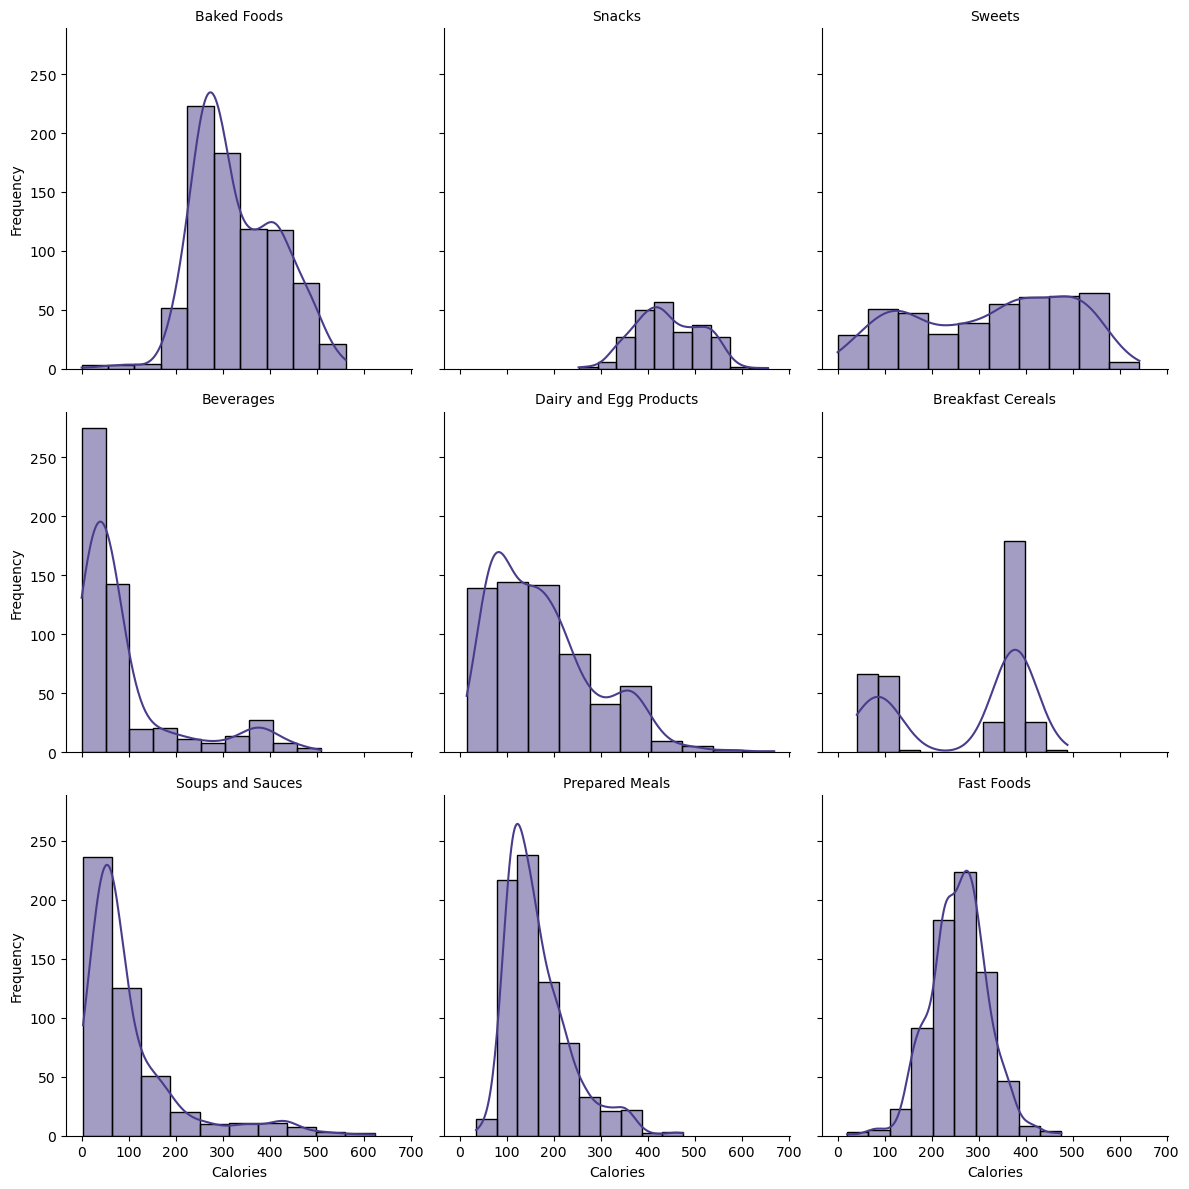

In [27]:
g = sns.FacetGrid(food_df, col='Food Group', col_wrap=3, height=4)
g.map(sns.histplot, 'Calories', bins=10, kde=True, color='darkslateblue', edgecolor='black')
g.set_titles('{col_name}')
g.set_axis_labels('Calories', 'Frequency')
plt.tight_layout()
plt.show()

Based on the analysis above, it is evident that food groups such as 'Baked Foods', 'Prepared Meals', and 'Fast Foods' contribute to the highest calorie intake.

##### Relationships between different nutrients across Food Groups

Plotting scatter plots to explore relationships between different nutrients. For example, Carbs vs. Sugar to see if sugary foods are also high in carbs.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


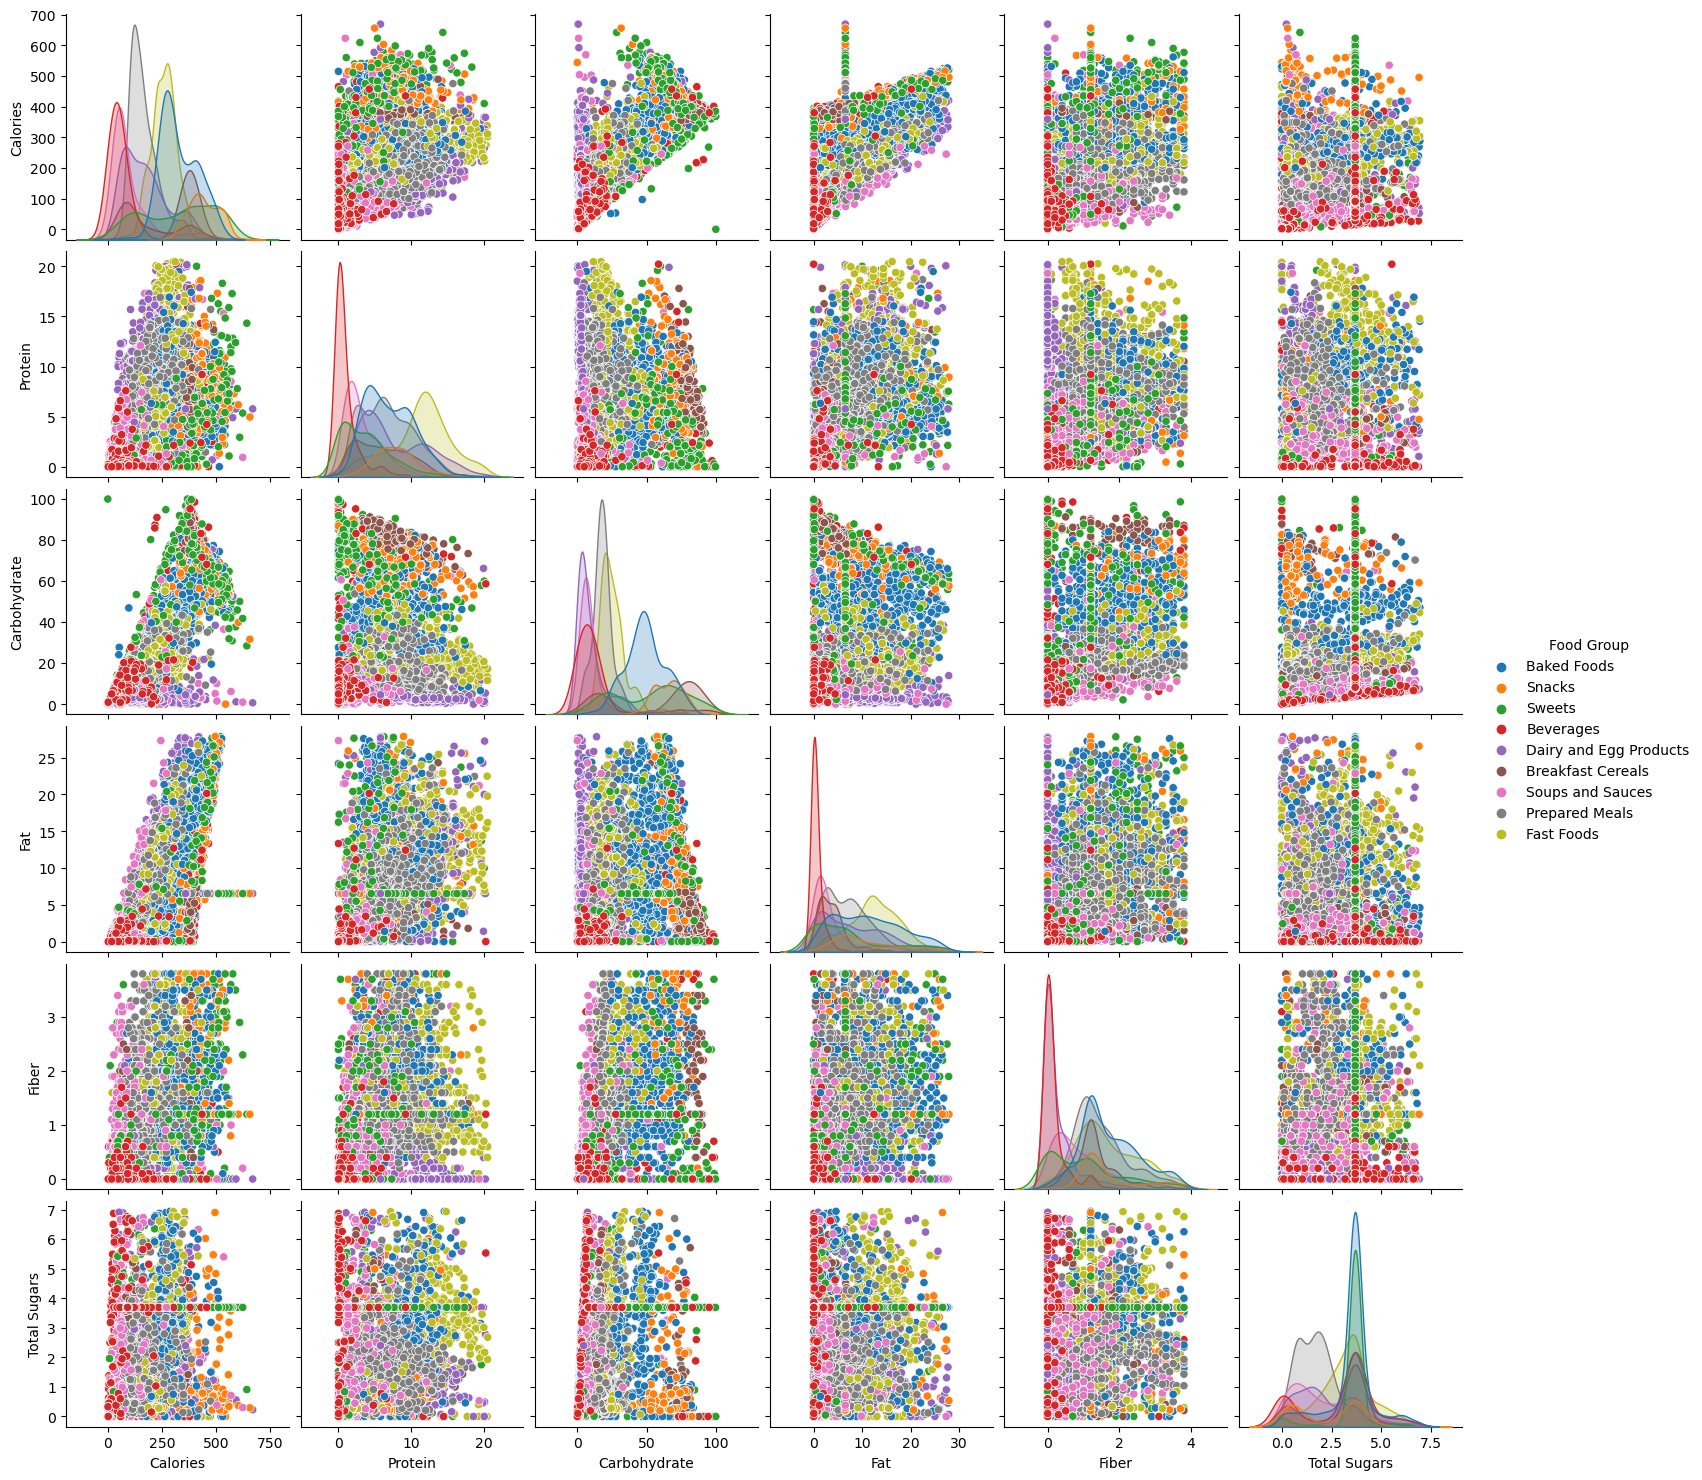

In [28]:
sns.pairplot(data=food_df[['Calories', 'Protein', 'Carbohydrate', 'Fat', 'Fiber', 'Total Sugars', 'Food Group']], hue='Food Group')

### 5 . Wrap-up

Observation Analysis:
Upon observing the data, it becomes evident that foods rich in Protein and Fiber tend to exhibit higher levels of Total Sugars. Conversely, lower levels of these nutrients are observed in foods with lower Protein and Fiber content. Additionally, foods with higher Fat content generally contain more Fiber.

An intriguing finding emerges: foods with lower calorie counts also demonstrate lower levels of Fat, Carbs, and Protein. This trend is particularly noticeable among Beverages and Breakfast Cereals, which predominantly fall within this category. Further analysis is required to ensure there is no overlap in the data points.

Overall, the plot suggests that foods containing between 150 to 200 Calories typically feature higher Fiber content, balanced Fat levels, lower Carbs, and increased Protein content.

-----------------------------------------------------------------------------------------------------------------------------

If we have time and data we can do the following:

a. Creating a Visualization where axis represents the food groups vs nutritional / mean nutritional values (protein, carbohydrate, fat, fiber, and total sugars) vs calories. The calories are visualized as a curve in the background.

b. Nutrient per Serving: Calculate the amount of each nutrient per serving size (e.g., grams of protein per 142g serving) for different products. This allows for easier comparison when planning meals.

c. Dietary Needs: Analyze the data to see which food groups are good sources of specific nutrients for different dietary needs (e.g., high protein for athletes, low sugar for diabetics).